In [26]:
from soview import *
import pandas as pd
import datetime
import palettable
import squarify

scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.20.3 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.1 python-igraph==0.9.8 pynndescent==0.5.5
squidpy==1.1.2


In [4]:
method_dataset = pd.read_feather('method_dataset.feather')

In [8]:
method_dataset_sub = method_dataset[['method','is_covered','type']]

In [9]:
method_dataset_sub.

,method,is_covered,type
0,Trendsceek,2,SE analysis
1,SpatialDE,2,SE analysis
2,SPARK,2,SE analysis
3,SPARK-X,2,SE analysis
4,sepal,2,SE analysis
...,...,...,...
60,MERINGUE,2,SE analysis
61,Haystack,2,SE analysis
62,PASTE,2,Alignment
63,scGCO,2,SE analysis


In [12]:
is_covered_onehot = pd.get_dummies(method_dataset_sub.is_covered, prefix='is_covered')

In [16]:
method_dataset_sub = method_dataset_sub.join(is_covered_onehot)

In [17]:
method_dataset_sub

,method,is_covered,type,is_covered_0,is_covered_1,is_covered_2
0,Trendsceek,2,SE analysis,0,0,1
1,SpatialDE,2,SE analysis,0,0,1
2,SPARK,2,SE analysis,0,0,1
3,SPARK-X,2,SE analysis,0,0,1
4,sepal,2,SE analysis,0,0,1
...,...,...,...,...,...,...
60,MERINGUE,2,SE analysis,0,0,1
61,Haystack,2,SE analysis,0,0,1
62,PASTE,2,Alignment,0,0,1
63,scGCO,2,SE analysis,0,0,1


In [20]:
methodtype_iscovered = method_dataset_sub.groupby('type').agg('sum')

In [23]:
methodtype_iscovered = methodtype_iscovered.reset_index()

In [24]:
methodtype_iscovered

,type,is_covered_0,is_covered_1,is_covered_2
0,Alignment,0,0,1
1,Cell-type annotation,1,0,2
2,Expression prediction,0,0,3
3,Framework,0,0,6
4,Gene imputation,0,0,8
5,Interactions,0,0,4
6,Label-free Segmentation,0,1,1
7,Resolution enhancement,0,0,2
8,SE analysis,0,0,16
9,Spatial clustering,1,1,8


In [31]:
methodtype_iscovered['is_covered_2_stack'] = methodtype_iscovered['is_covered_2']+methodtype_iscovered['is_covered_0']+methodtype_iscovered['is_covered_1']
methodtype_iscovered['is_covered_1_stack'] = methodtype_iscovered['is_covered_0']+methodtype_iscovered['is_covered_1']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


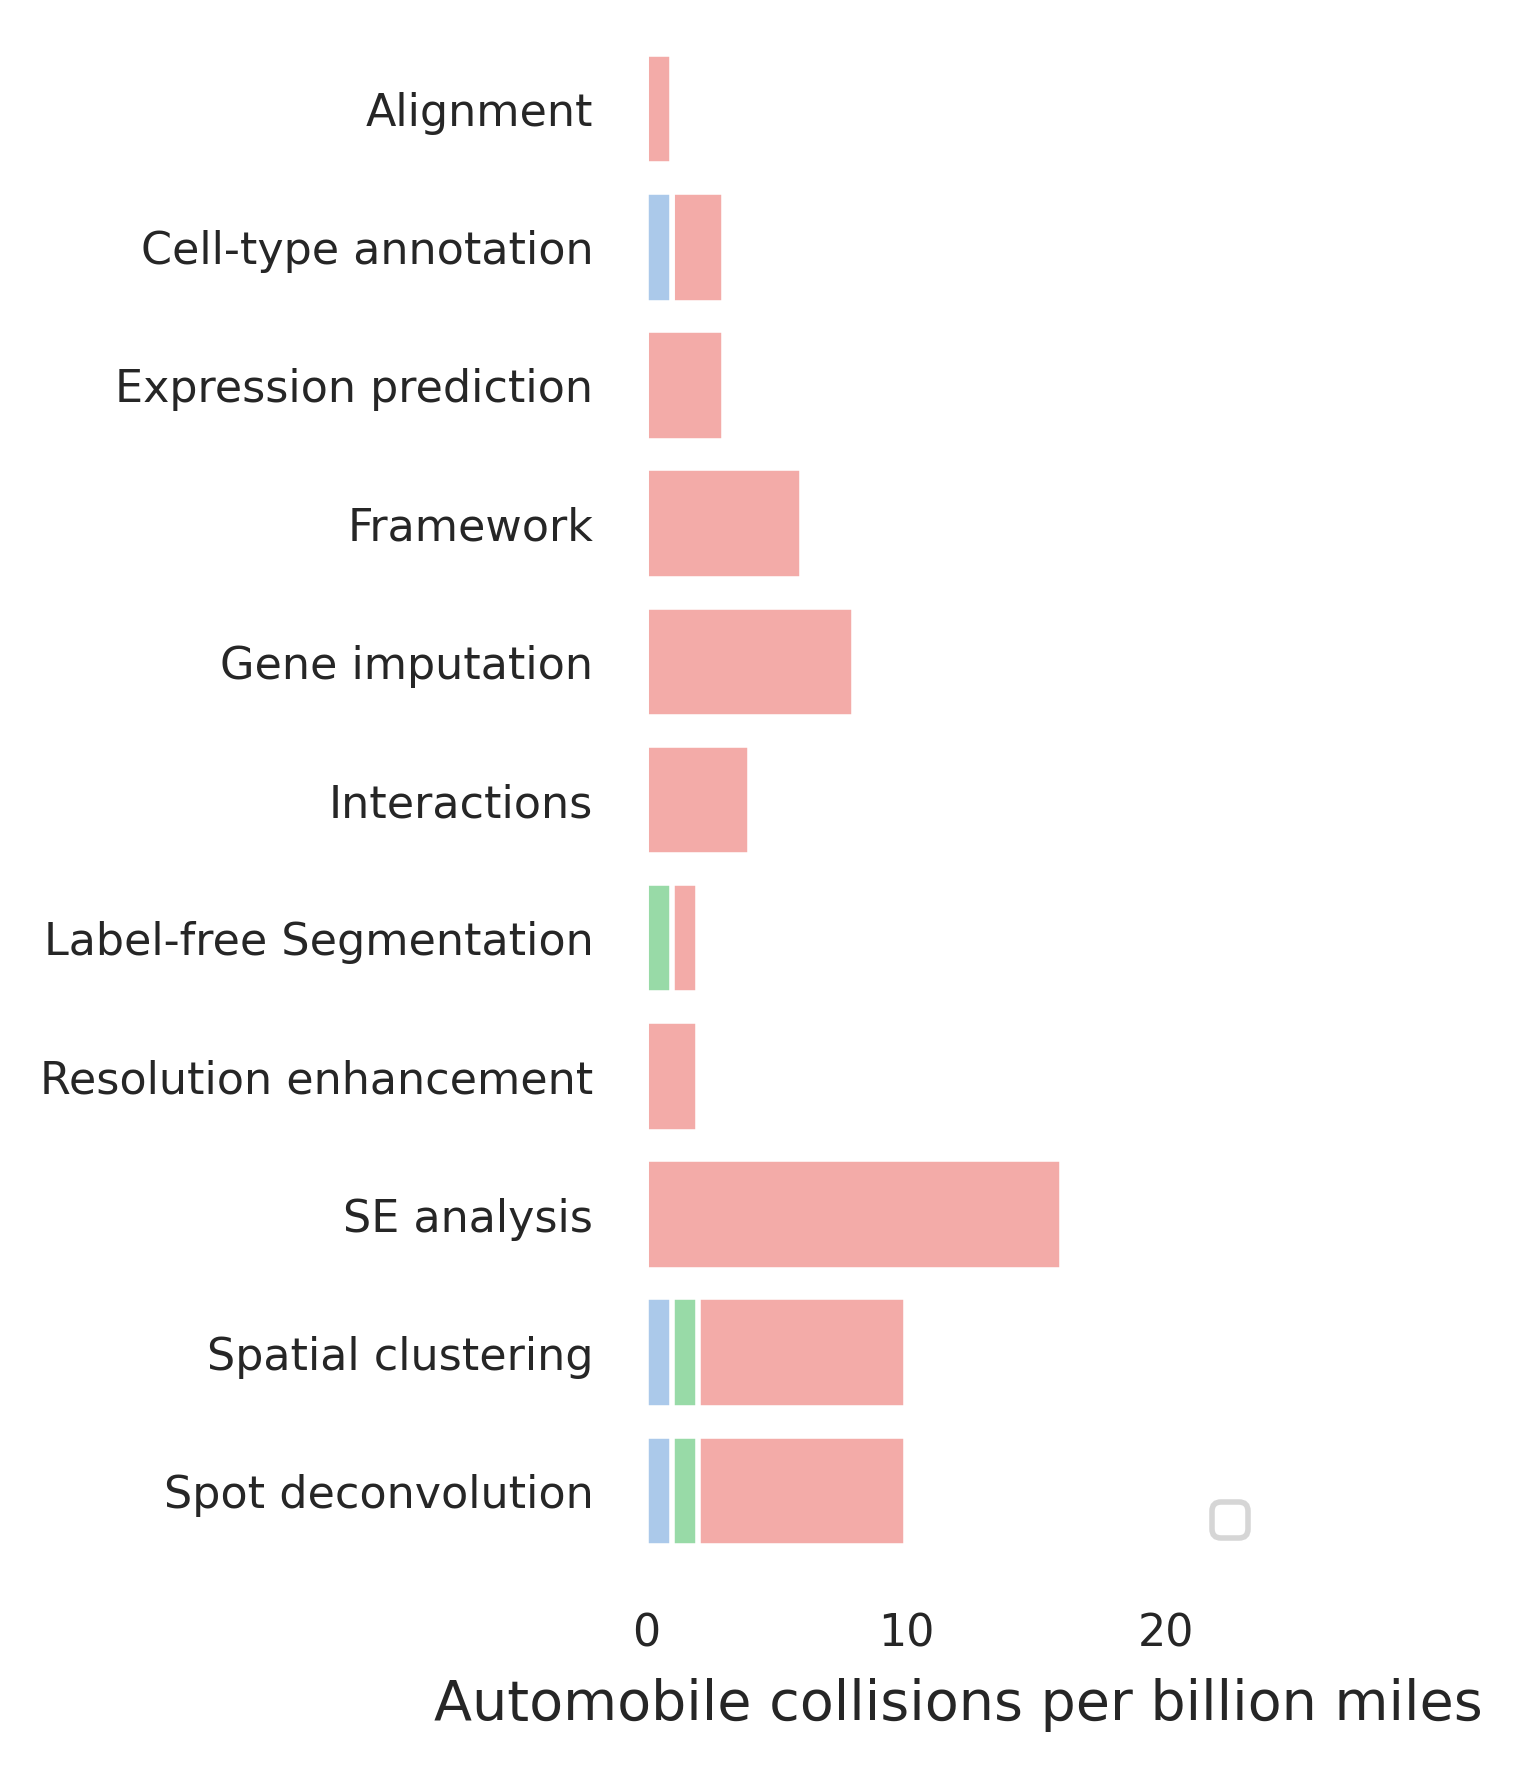

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(2,5))



# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="is_covered_2_stack", y="type", data=methodtype_iscovered,
            # label="Total",
            color="r")
sns.barplot(x="is_covered_1_stack", y="type", data=methodtype_iscovered,
            # label="Total",
            color="g")
sns.barplot(x="is_covered_0", y="type", data=methodtype_iscovered,
            # label="Total",
            color="b")

# # Plot the crashes where alcohol was involved
# sns.set_color_codes("muted")
# sns.barplot(x="alcohol", y="abbrev", data=crashes,
#             label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="count")
sns.despine(left=True, bottom=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


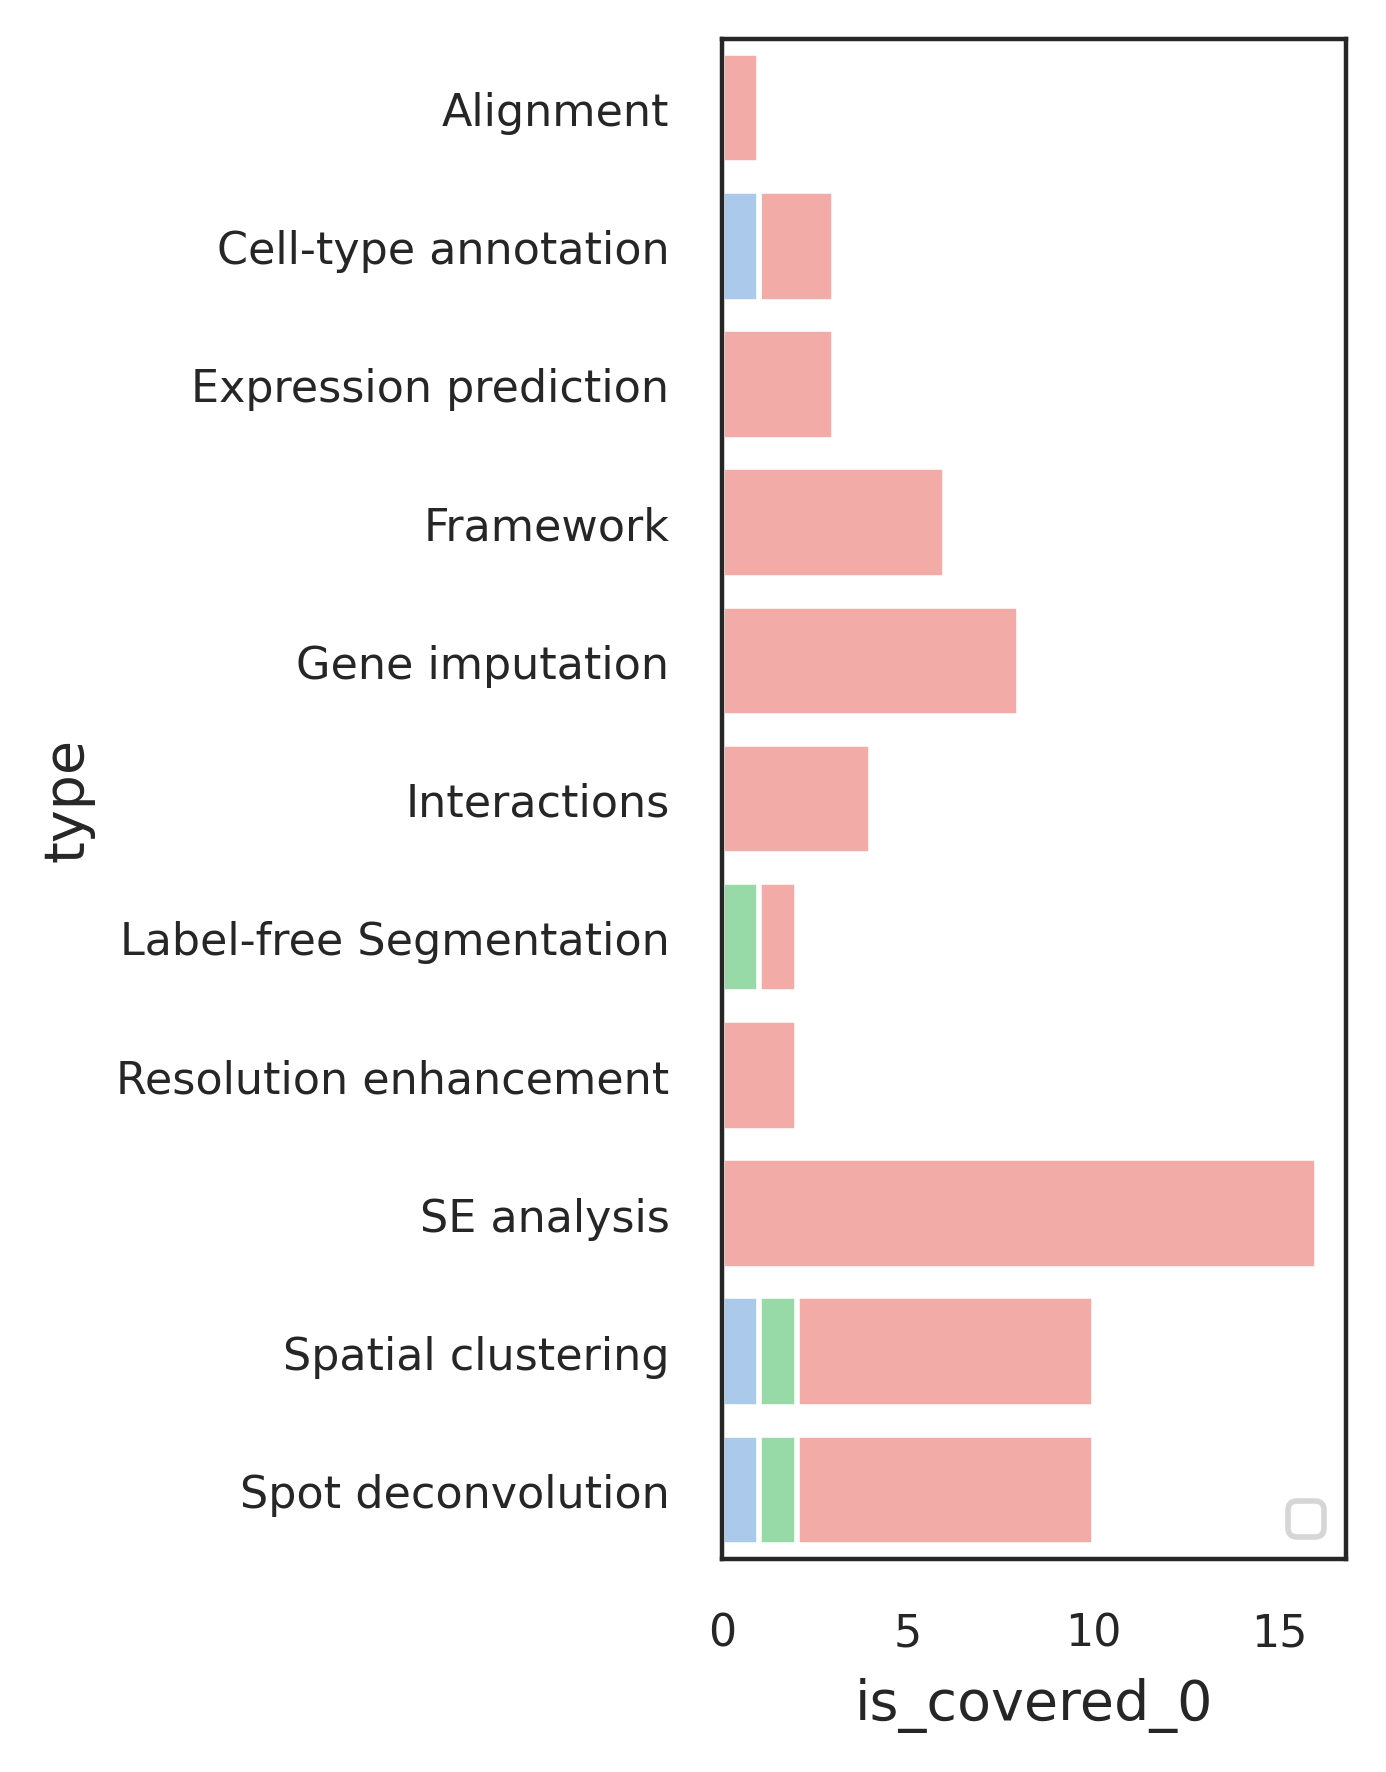

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(2,5))



# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="is_covered_2_stack", y="type", data=methodtype_iscovered,
            # label="Total",
            color="r"
           )
sns.barplot(x="is_covered_1_stack", y="type", data=methodtype_iscovered,
            # label="Total",
            color="g")
sns.barplot(x="is_covered_0", y="type", data=methodtype_iscovered,
            # label="Total",
            color="b")

# # Plot the crashes where alcohol was involved
# sns.set_color_codes("muted")
# sns.barplot(x="alcohol", y="abbrev", data=crashes,
#             label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
# ax.set(xlim=(0, 24), ylabel="",
#        xlabel="count")
# sns.despine(left=True, bottom=True)

In [37]:
all_data_iscovered = np.sum(methodtype_iscovered,axis=0)

In [38]:
all_data_iscovered

type                  AlignmentCell-type annotationExpression predic...
is_covered_0                                                          3
is_covered_1                                                          3
is_covered_2                                                         59
is_covered_2_stack                                                   65
is_covered_1_stack                                                    6
dtype: object

In [36]:
all_data_iscoveredmethodtype_iscovaered

,type,is_covered_0,is_covered_1,is_covered_2,is_covered_2_stack,is_covered_1_stack
0,Alignment,0,0,1,1,0
1,Cell-type annotation,1,0,2,3,1
2,Expression prediction,0,0,3,3,0
3,Framework,0,0,6,6,0
4,Gene imputation,0,0,8,8,0
5,Interactions,0,0,4,4,0
6,Label-free Segmentation,0,1,1,2,1
7,Resolution enhancement,0,0,2,2,0
8,SE analysis,0,0,16,16,0
9,Spatial clustering,1,1,8,10,2


In [48]:
cmp = palettable.colorbrewer.qualitative.Pastel1_9.mpl_colors

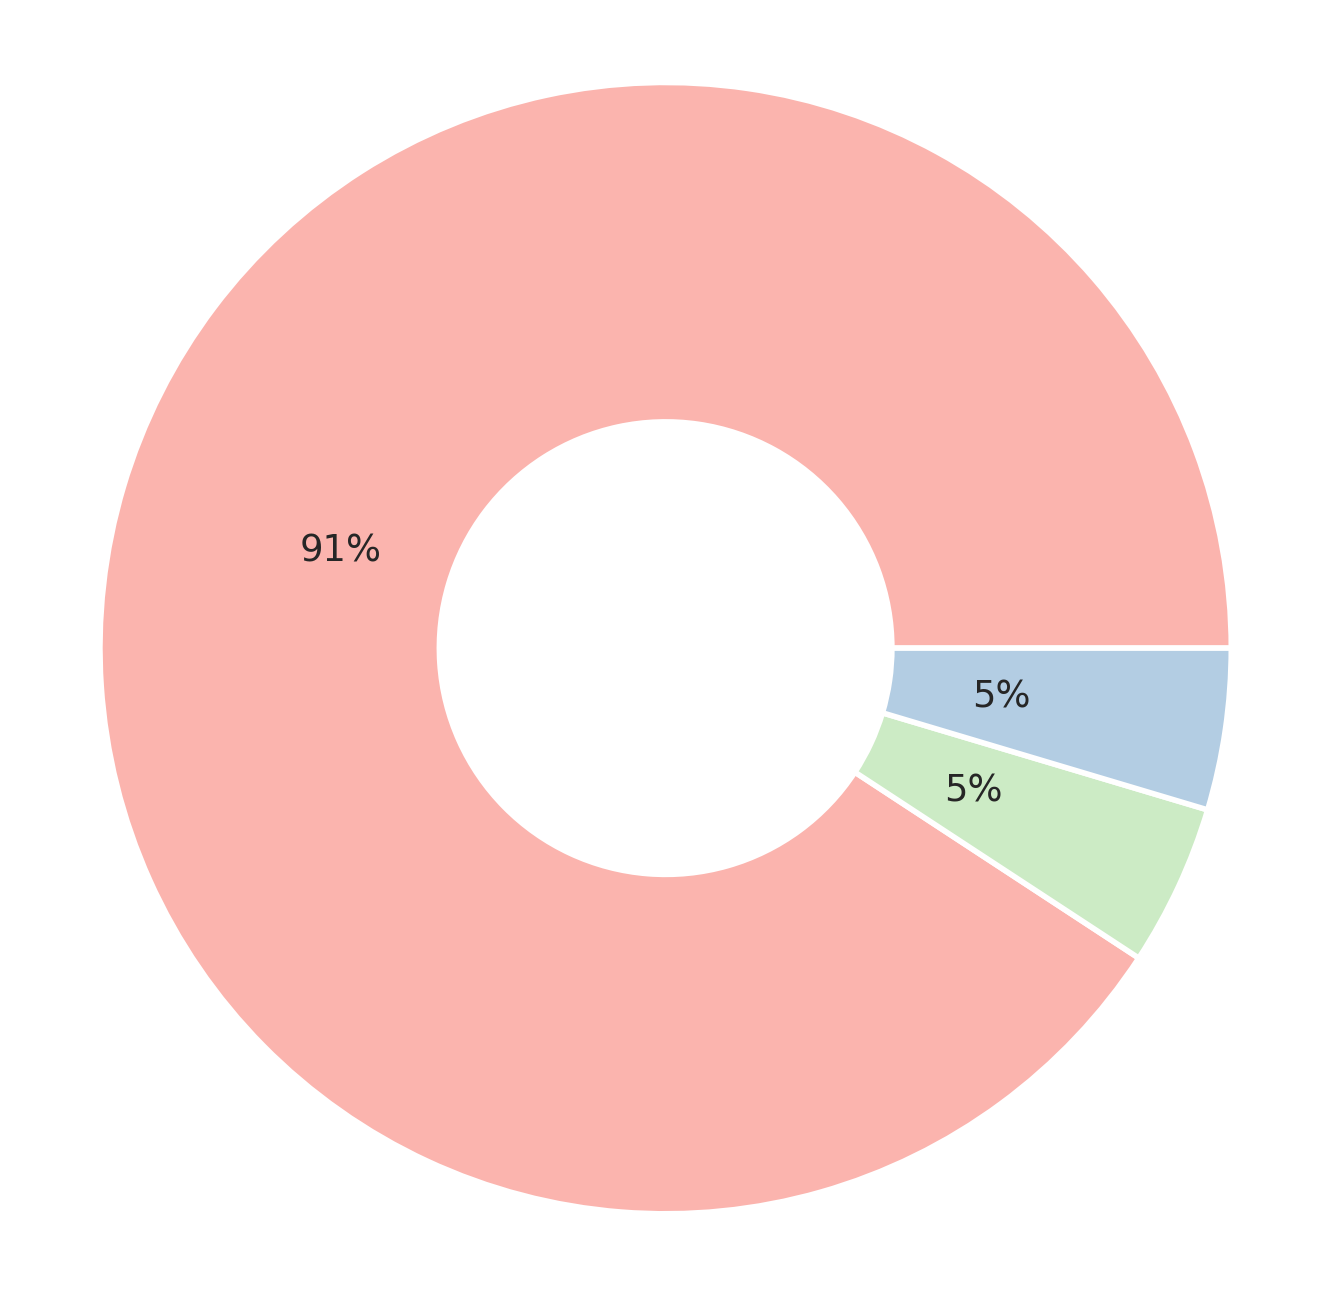

In [51]:
df_feature = 'Species'
# labels,sizes = np.unique(df[df_feature],return_counts=1)
# labels = [labels[5],labels[4],labels[2],labels[7],labels[1],labels[0],labels[3]]
# sizes = [sizes[5],sizes[4],sizes[2],sizes[7],sizes[1],sizes[0],sizes[3]]

labels = ['2','1','0']
sizes = [59,3,3]
colors = [cmp[0],cmp[2],cmp[1]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,
        # labels=labels,
                                          autopct='%.0f%%',
                                          textprops={'size': 'smaller'},
                                          shadow=False, radius=0.5,
        wedgeprops=dict(width=0.3, edgecolor='w'),
        colors=colors
                                          # explode=explode
       )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()